In [232]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,accuracy_score

In [3]:
def show_box(value):
  sns.set(font_scale=2)
  sns.heatmap([[value]], annot=True)
  sns.set(font_scale=1)

In [5]:
df_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")

# Análise Inicial

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
df_train.columns  # Colunas

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df_train.shape # Tamanho

(891, 12)

In [ ]:
df_train.describe() # Resumo

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df_train.isnull().sum().sort_values(ascending=False)
# Linhas sem cadastro

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [ ]:
(df_train.isnull().sum() / len(df_train)) * 100.0
# Porcentagem de linhas sem cadastro

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

### Idade

In [ ]:
df_train['Age'].mean() # Média de Idade Geral

29.69911764705882

In [ ]:
df_train.loc[df_train['Sex'] =="female", 'Age'].mean() # Média de Idade Feminino

27.915708812260537

In [ ]:
df_train.loc[df_train['Sex'] =="male", 'Age'].mean() # Média de Idade Masculino

30.72664459161148

### Sobrevivencia

In [ ]:
df_train['Survived'].value_counts() # Quantidade de sobrevivente (GERAL)

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
(len(df_train[df_train['Survived'] == 1])/ len(df_train)) * 100.0
## Porcentagem de sobreviventes

38.38383838383838

In [ ]:
(len(df_train[df_train['Survived'] == 0])/ len(df_train)) * 100.0
## Porcentagem de não sobreviventes

61.61616161616161

## Correlação entre as informações

<ipython-input-7-155dd375a2e3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(), annot=True, cmap="crest")


<Axes: >

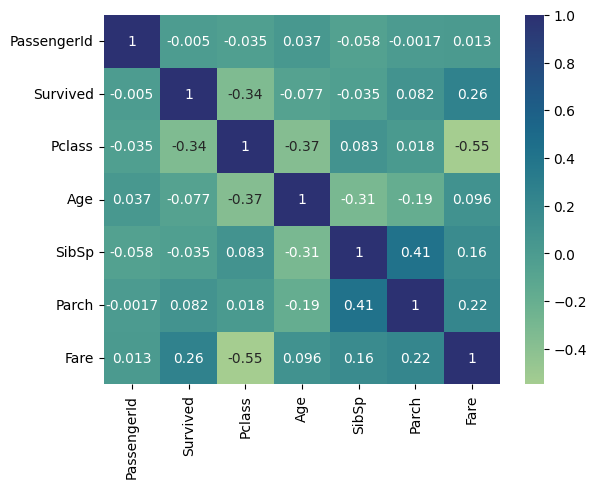

In [ ]:
sns.heatmap(df_train.corr(), annot=True, cmap="crest")
# Consigo descobrir os dados que possuem mais relação com a sobrevivencia de cada

## Resumo
- Quantidade de passageiros: 891
- TICKET:
  - Mais caro: 512.329200
  - Mais barato: 0
- IDADE
  - Média GERAL: 29.69 anos
  - Mais velha: 80 anos
  - Mais nova: 0.42 anos ~ 5.5 meses
- SOBREVIVENTES:
  - SIM: 342 (38.38%)
  - NÃO: 549 (61.62%)

  ## *Dados mais relevantes para sobrevivencia*
  - Valores mais proximos de "1"
  - Fare
  - Parch
  - Sibsp
  - Pclass
  - Age


# Análise - Idade

<Axes: xlabel='Pclass', ylabel='Age'>

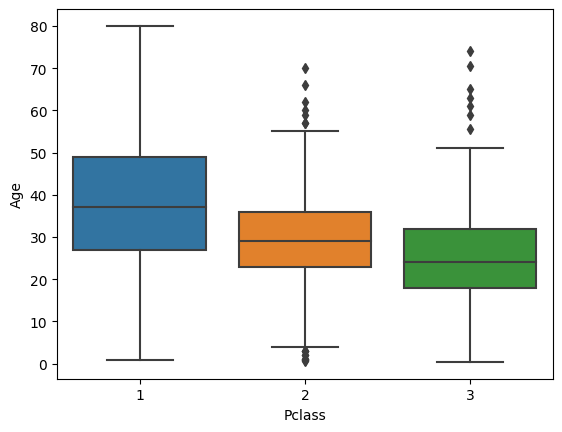

In [ ]:
sns.boxplot(x='Pclass',y='Age',data=df_train)
# Relação entre a Pclass e Age

<Axes: xlabel='Age', ylabel='Count'>

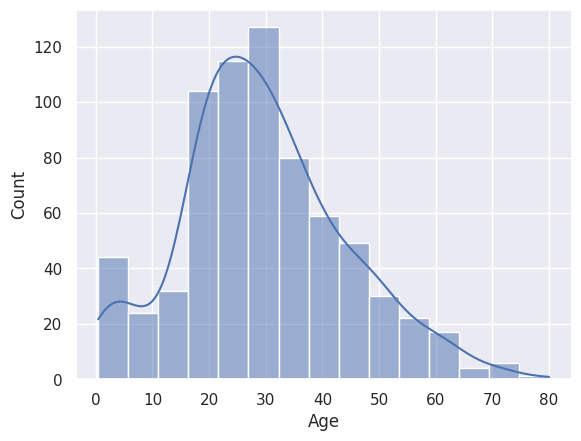

In [231]:
sns.histplot(data=df_train, x='Age', bins=15, kde=True)
# histograma com quantidade de pessoas por faixas de idade

## Verificação Crianças

In [ ]:
df_train.loc[df_train['Age'] <= 15].describe()
# Informações gerais sobre a pessoas com menos de 15 anos

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sobreviveu
count,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000
mean,431.602410,0.590361,2.626506,6.369518,1.734940,1.265060,32.785795,0.554217
std,287.079319,0.494757,0.619024,4.729063,1.638592,0.682255,33.466438,0.500073
min,8.000000,0.000000,1.000000,0.420000,0.000000,0.000000,7.225000,0.000000
25%,172.500000,0.000000,2.000000,2.000000,0.000000,1.000000,15.900000,0.000000
50%,436.000000,1.000000,3.000000,5.000000,1.000000,1.000000,26.250000,1.000000
75%,706.500000,1.000000,3.000000,9.500000,3.000000,2.000000,32.193750,1.000000
max,876.000000,1.000000,3.000000,15.000000,5.000000,2.000000,211.337500,1.000000


In [ ]:
df_train.loc[(df_train['Age'] <= 15) & (df_train['Sex'] == 'female')].describe()
# Informações sobre a pessoas sex female com menos de 15 anos

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sobreviveu
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.0
mean,415.837209,0.651163,2.627907,7.209302,1.279070,1.186047,31.302328,1.0
std,280.745261,0.482243,0.618110,4.919570,1.368447,0.763944,38.369737,0.0
min,10.000000,0.000000,1.000000,0.750000,0.000000,0.000000,7.225000,1.0
25%,160.500000,0.000000,2.000000,3.000000,0.000000,1.000000,14.454200,1.0
50%,447.000000,1.000000,3.000000,6.000000,1.000000,1.000000,22.025000,1.0
75%,644.000000,1.000000,3.000000,12.000000,2.000000,2.000000,31.275000,1.0
max,876.000000,1.000000,3.000000,15.000000,4.000000,2.000000,211.337500,1.0


In [ ]:
df_train.loc[(df_train['Age'] <= 15) & (df_train['Sex'] == 'male')].describe()
# Informações sobre a pessoas sex male com menos de 15 anos

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sobreviveu
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,448.550000,0.525000,2.625000,5.466750,2.225000,1.350000,34.380522,0.075000
std,296.365328,0.505736,0.627878,4.398238,1.775727,0.579567,27.647000,0.266747
min,8.000000,0.000000,1.000000,0.420000,0.000000,0.000000,7.229200,0.000000
25%,180.250000,0.000000,2.000000,1.750000,1.000000,1.000000,18.778125,0.000000
50%,397.500000,1.000000,3.000000,4.000000,1.000000,1.000000,29.125000,0.000000
75%,764.000000,1.000000,3.000000,9.000000,4.000000,2.000000,39.687500,0.000000
max,870.000000,1.000000,3.000000,15.000000,5.000000,2.000000,151.550000,1.000000


## Idade x Feminino

In [ ]:
df_train.loc[(df_train['Survived'] == 1) & (df_train['Sex'] == 'female'),'Age'].mean()
# Média idade das pessoas do sexo feminino que sobreviveram

28.84771573604061

In [ ]:
df_train.loc[(df_train['Survived'] == 1) & (df_train['Sex'] == 'female'),'Age'].value_counts()
# Idade das pessoas do sexo feminino que sobreviveram

24.00    14
22.00    10
30.00     9
35.00     8
18.00     8
36.00     7
19.00     7
33.00     6
16.00     5
17.00     5
29.00     5
28.00     5
31.00     5
4.00      5
27.00     5
40.00     5
34.00     4
50.00     4
38.00     4
23.00     4
15.00     4
5.00      4
21.00     4
39.00     4
14.00     3
58.00     3
45.00     3
42.00     3
48.00     3
54.00     3
26.00     3
0.75      2
52.00     2
13.00     2
2.00      2
25.00     2
44.00     2
41.00     2
32.00     2
1.00      2
49.00     2
63.00     2
60.00     1
6.00      1
47.00     1
62.00     1
43.00     1
51.00     1
53.00     1
55.00     1
3.00      1
32.50     1
7.00      1
8.00      1
56.00     1
Name: Age, dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

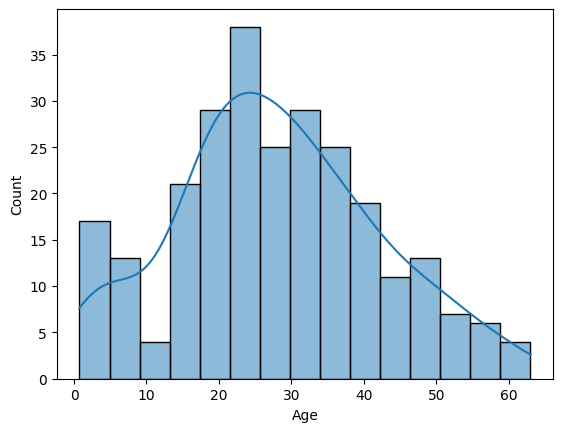

In [ ]:
sns.histplot(data=df_train.loc[(df_train['Sex'] == 'female')], x='Age', bins=15, kde=True)
# Histograma com idade das pessoas do genero female

## Idade x Masculino

In [ ]:
df_train.loc[(df_train['Survived'] == 1) & (df_train['Sex'] == 'male'),'Age'].mean()
# Média idade das pessoas do sexo masculino que sobreviveram

27.276021505376345

In [ ]:
df_train.loc[(df_train['Survived'] == 1) & (df_train['Sex'] == 'male'),'Age'].value_counts()
# Idade das pessoas do sexo masculino que sobreviveram

32.00    7
27.00    6
36.00    4
3.00     4
25.00    4
29.00    3
35.00    3
1.00     3
42.00    3
20.00    3
26.00    3
31.00    3
48.00    3
4.00     2
28.00    2
19.00    2
49.00    2
34.00    2
45.00    2
9.00     2
0.83     2
56.00    1
80.00    1
8.00     1
6.00     1
0.67     1
11.00    1
60.00    1
62.00    1
22.00    1
0.42     1
17.00    1
50.00    1
2.00     1
52.00    1
44.00    1
39.00    1
21.00    1
0.92     1
30.00    1
37.00    1
38.00    1
16.00    1
40.00    1
18.00    1
24.00    1
12.00    1
23.00    1
51.00    1
Name: Age, dtype: int64

<Axes: xlabel='Age', ylabel='Count'>

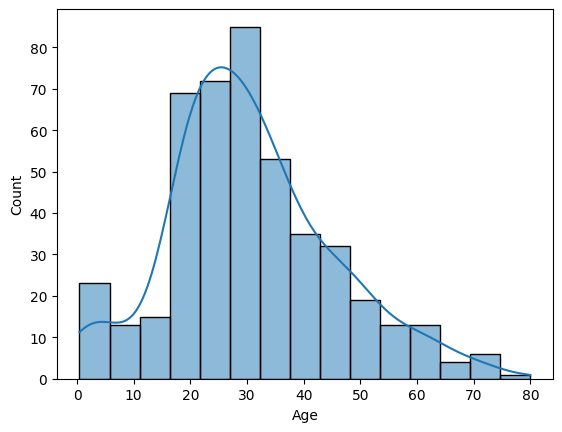

In [ ]:
sns.histplot(data=df_train.loc[(df_train['Sex'] == 'male')], x='Age', bins=15, kde=True)
# Histograma com idade das pessoas do genero male

<Axes: xlabel='Age', ylabel='Count'>

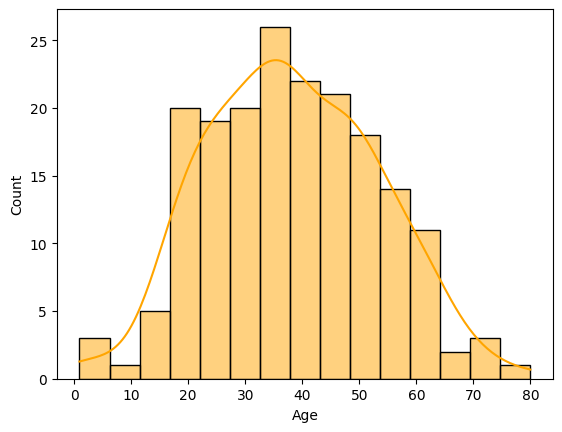

In [ ]:
sns.histplot(data=df_train.loc[(df_train['Pclass'] == 1)], x='Age', bins=15, kde=True, color='orange')
## Idade das pessoas da Classe 1

## Resumo

### Análise das idades do dataframe
- Existe grande quantidade de pessoas entre 15 e 40 anos

# Análise - Sobrevivencia

## Sobreviventes X Idade

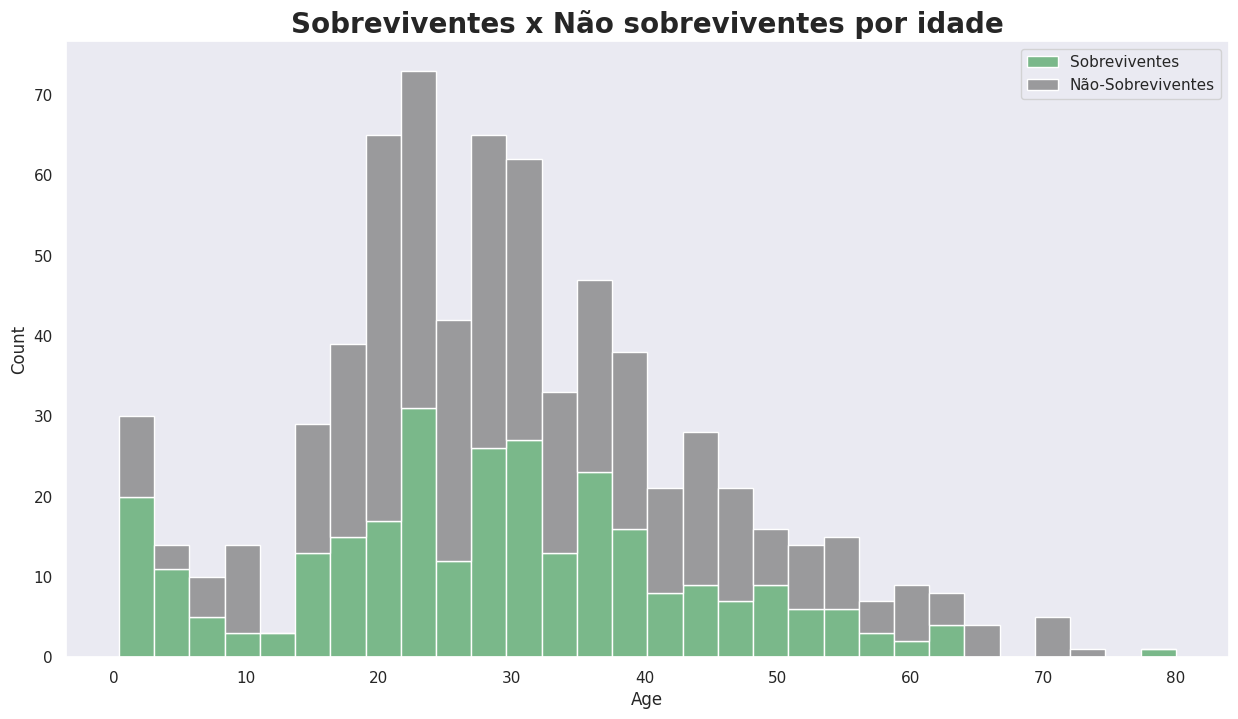

In [ ]:
figure, ax = plt.subplots(figsize=(15, 8))

sns.histplot(data=df_train, x='Age', hue='Survived', multiple='stack', bins=30, palette=['gray', 'g'])

ax.set_title('Sobreviventes x Não sobreviventes por idade', fontsize=20, fontweight='bold')
ax.legend(['Sobreviventes', 'Não-Sobreviventes'])

plt.show()

## Sobreviventes X Sexo

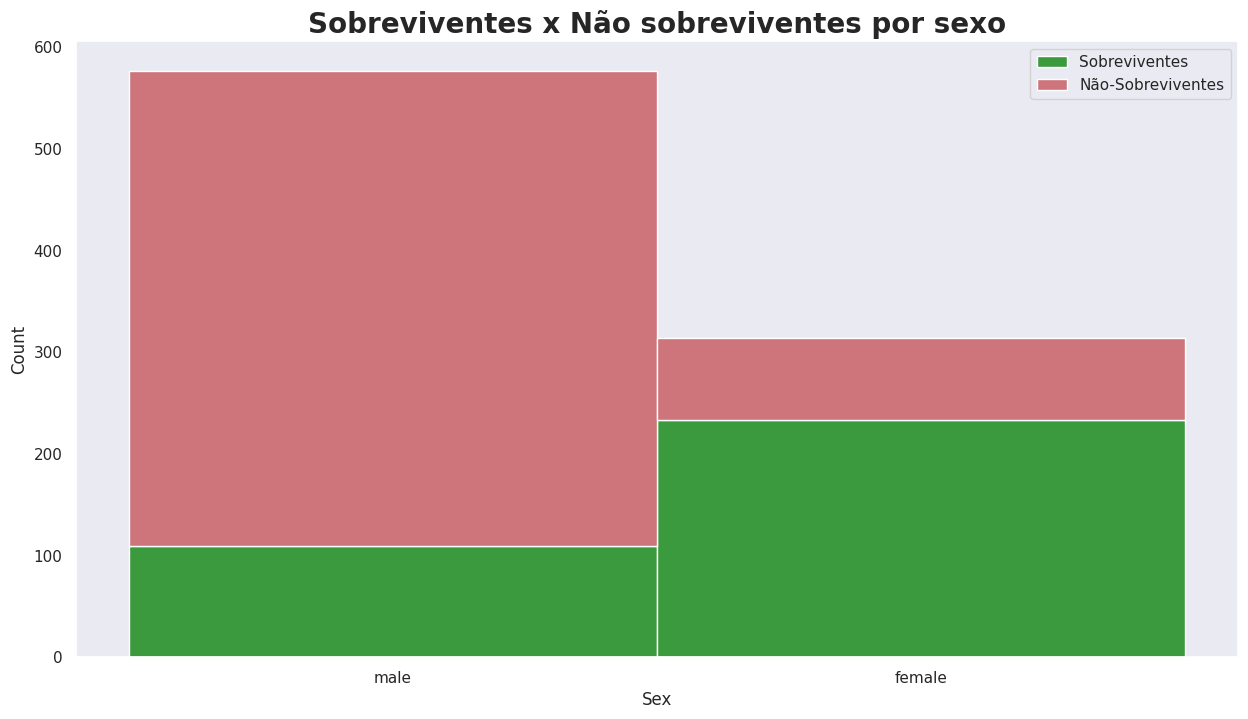

In [ ]:
figure, ax = plt.subplots(figsize=(15, 8))

sns.histplot(data=df_train, x='Sex', hue='Survived', multiple='stack', bins=30, palette=['r', 'green'])

ax.set_title('Sobreviventes x Não sobreviventes por Sexo', fontsize=20, fontweight='bold')
ax.legend(['Sobreviventes', 'Não-Sobreviventes'])

plt.show()

### Feminino X Idade

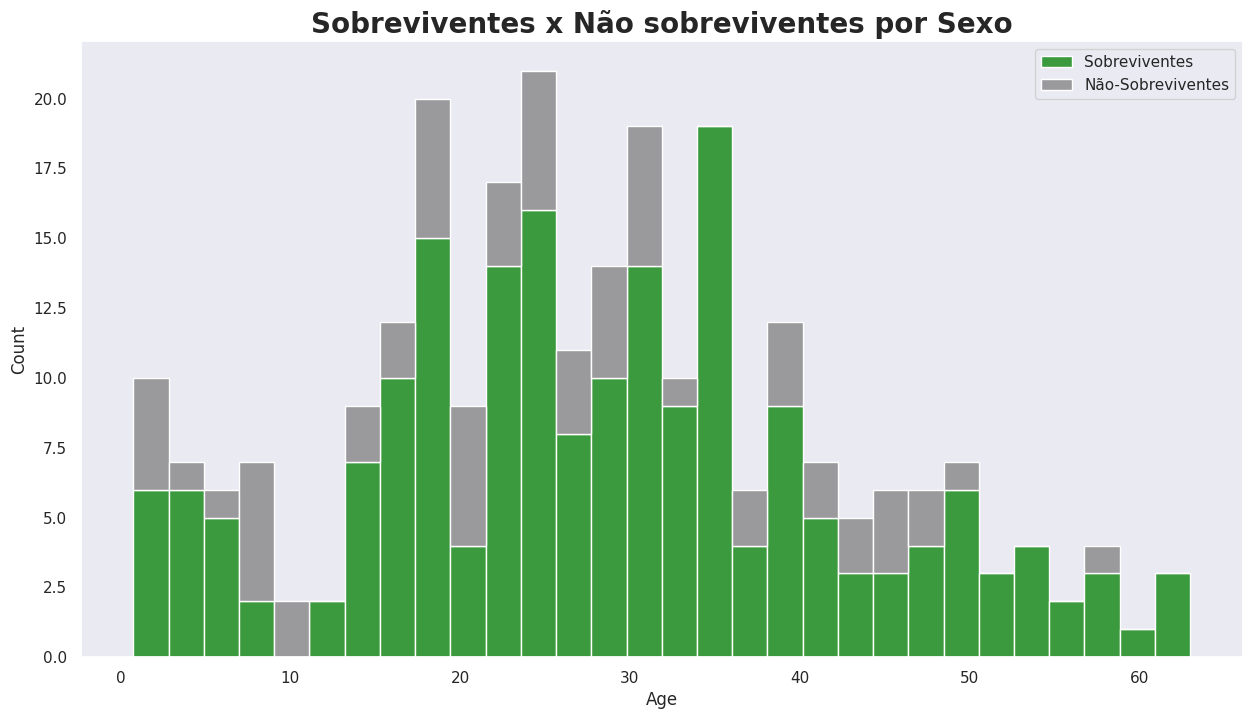

In [ ]:
figure, ax = plt.subplots(figsize=(15, 8))

sns.histplot(data=df_train.loc[df_train['Sex'] == 'female'], x='Age', hue='Survived', multiple='stack', bins=30, palette=['gray', 'green'])

ax.set_title('Sobreviventes x Não sobreviventes por Sexo', fontsize=20, fontweight='bold')
ax.legend(['Sobreviventes', 'Não-Sobreviventes'])

plt.show()

### Masculino X Idade

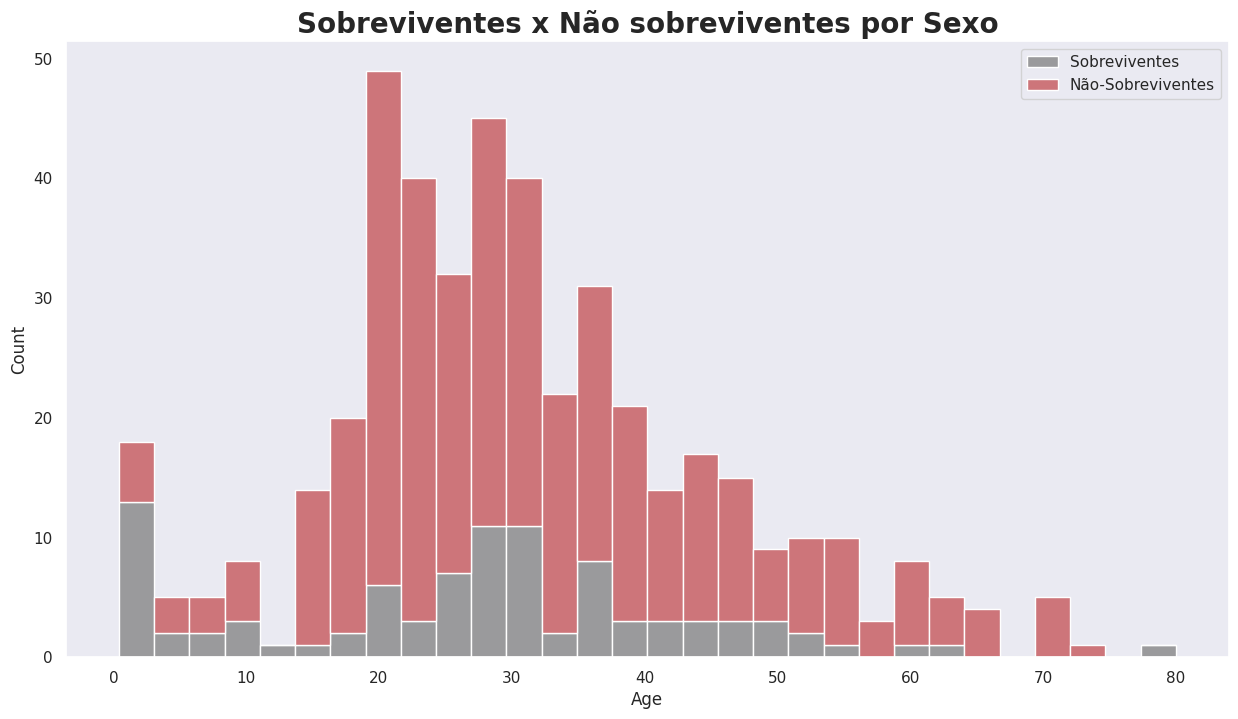

In [ ]:
figure, ax = plt.subplots(figsize=(15, 8))

sns.histplot(data=df_train.loc[df_train['Sex'] == 'male'], x='Age', hue='Survived', multiple='stack', bins=30, palette=['r', 'gray'])

ax.set_title('Sobreviventes x Não sobreviventes por Sexo', fontsize=20, fontweight='bold')
ax.legend(['Sobreviventes', 'Não-Sobreviventes'])

plt.show()

### Sexo x Pclass

<Axes: xlabel='Sex', ylabel='count'>

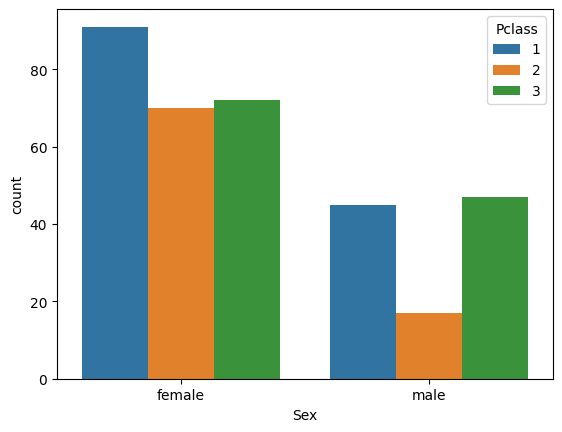

In [ ]:
sns.countplot(data=df_train.loc[df_train['Survived'] == 1] , x='Sex', hue='Pclass')

## Sobreviventes X Pclass

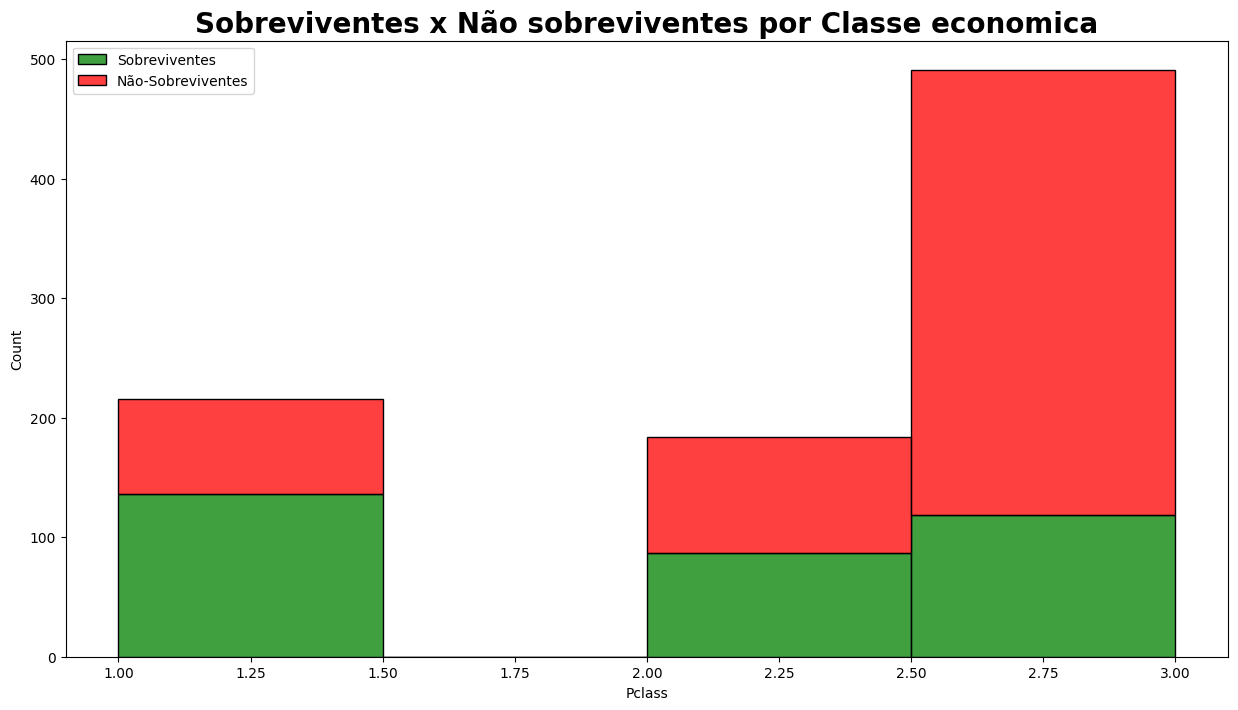

In [ ]:
figure, ax = plt.subplots(figsize=(15, 8))

sns.histplot(data=df_train, x='Pclass', hue='Survived', multiple='stack', bins=4, palette=['r', 'green'])

ax.set_title('Sobreviventes x Não sobreviventes por Classe economica', fontsize=20, fontweight='bold')
ax.legend(['Sobreviventes', 'Não-Sobreviventes'])

plt.show()

## Resumo

### Análise de sobrevivencia em relação aos demais dados. Levando em consideração o gráfico de correlação entre as informações do dataframe
- Dados mais relevantes para o sobrevivencia dos passageiros segundo as análises acima:
  - Sex
  - Pclass
  - Age
  - Fare

# Análise - Pclass

<Axes: xlabel='Pclass', ylabel='Age'>

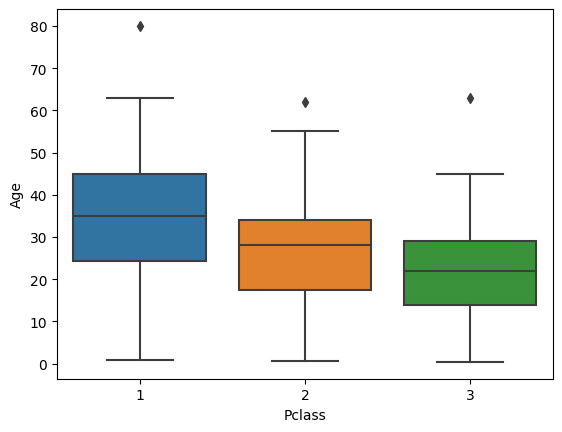

In [6]:
sns.boxplot(x='Pclass',y='Age',data=df_train.loc[df_train['Survived'] == 1])
# Relação entre a Pclass e Age

## Pclass(1) x Sobrevivencia x Idade

<Axes: xlabel='Age', ylabel='Count'>

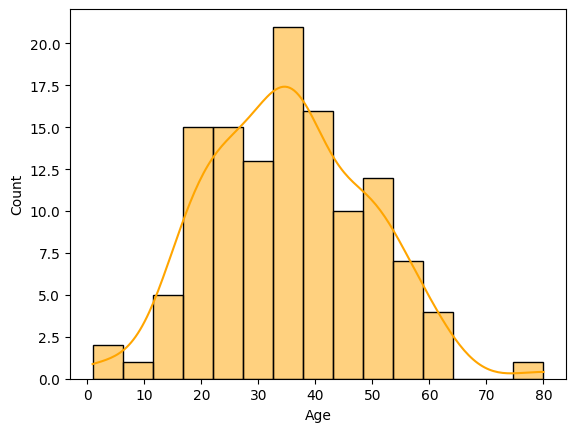

In [ ]:
sns.histplot(data=df_train.loc[(df_train['Pclass'] == 1) & (df_train['Survived'] == 1)], x='Age', bins=15, kde=True, color='orange')
## Idade das pessoas da Classe 1 que sobreviveram

## Pclass(2) x Sobrevivencia x Idade

<Axes: xlabel='Age', ylabel='Count'>

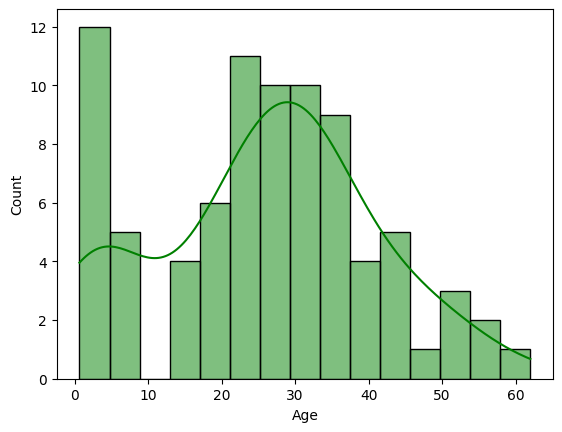

In [ ]:
sns.histplot(data=df_train.loc[(df_train['Pclass'] == 2) & (df_train['Survived'] == 1)], x='Age', bins=15, kde=True, color='green')
## Idade das pessoas da Classe 2 que sobreviveram

## Pclass(3) x Sobrevivencia x Idade

<Axes: xlabel='Age', ylabel='Count'>

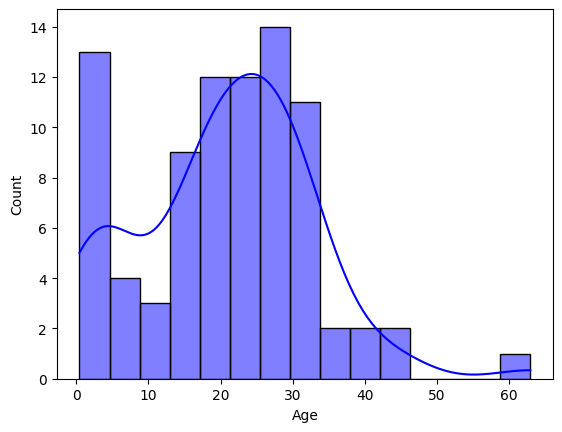

In [ ]:
sns.histplot(data=df_train.loc[(df_train['Pclass'] == 3) & (df_train['Survived'] == 1)], x='Age', bins=15, kde=True, color='blue')
## Idade das pessoas da Classe 3 que sobreviveram

## Resumo

### Pessoas da classe 1 com idade entre 15 e 55 anos tiveram taxa de sobrevivencia maior

### Crianças da classe 2 e pessoas entre 15 e 50 anos tiveram maior taxa de sobrevivencia

### Na classe 3 as crianças e pessoas entre 12 e 35 anos tiveram maior numero de sobreviventes

# Árvore de Decisão

In [220]:
df_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")

In [221]:
X_train = df_train[['Parch', 'Sex', 'Age', 'Fare']]
y_train = df_train['Survived']

In [222]:
X_train['Sex'] = X_train['Sex'].map({'female': 0, 'male': 1})
X_train['Age'].fillna(X_train['Age'].mean(), inplace=True)

<ipython-input-222-776169a54179>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Sex'] = X_train['Sex'].map({'female': 0, 'male': 1})
<ipython-input-222-776169a54179>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Age'].fillna(X_train['Age'].mean(), inplace=True)


In [223]:
arvoreDecisao = DecisionTreeClassifier()

In [224]:
arvoreDecisao.fit(X_train, y_train)

DecisionTreeClassifier()

In [225]:
X_test = df_test[['Parch', 'Sex', 'Age', 'Fare']]

In [226]:
X_test['Sex'] = X_test['Sex'].map({'female': 0, 'male': 1})
X_test['Age'].fillna(X_test['Age'].mean(), inplace=True)
X_test['Fare'].fillna(X_test['Fare'].mean(), inplace=True)

<ipython-input-226-d5cdfd953842>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Sex'] = X_test['Sex'].map({'female': 0, 'male': 1})
<ipython-input-226-d5cdfd953842>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Age'].fillna(X_test['Age'].mean(), inplace=True)
<ipython-input-226-d5cdfd953842>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Fare'].fill

In [227]:
y_pred = arvoreDecisao.predict(X_test)

In [228]:
y_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [229]:
submission = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': y_pred})
submission.to_csv('submission.csv', index=False)

In [230]:
df_test['Survived']=y_pred
df_test[['PassengerId','Survived']]

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


# Random Forest

In [299]:
df_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")

In [300]:
X_train = df_train[['Parch', 'Sex', 'Age', 'Fare']]
y_train = df_train['Survived']

In [301]:
X_train['Sex'] = X_train['Sex'].map({'female': 0, 'male': 1})
X_train['Age'].fillna(X_train['Age'].mean(), inplace=True)

<ipython-input-301-776169a54179>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Sex'] = X_train['Sex'].map({'female': 0, 'male': 1})
<ipython-input-301-776169a54179>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Age'].fillna(X_train['Age'].mean(), inplace=True)


In [302]:
X_test = df_test[['Parch', 'Sex', 'Age', 'Fare']]

In [303]:
randomForest = RandomForestClassifier(n_estimators=418, random_state=50)

In [304]:
randomForest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=418, random_state=50)

In [305]:
X_test['Sex'] = X_test['Sex'].map({'female': 0, 'male': 1})
X_test['Age'].fillna(X_test['Age'].mean(), inplace=True)
X_test['Fare'].fillna(X_test['Fare'].mean(), inplace=True)

<ipython-input-305-d5cdfd953842>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Sex'] = X_test['Sex'].map({'female': 0, 'male': 1})
<ipython-input-305-d5cdfd953842>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Age'].fillna(X_test['Age'].mean(), inplace=True)
<ipython-input-305-d5cdfd953842>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Fare'].fill

In [306]:
y_pred = randomForest.predict(X_test)

In [307]:
y_pred

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [308]:
df_test['Survived'] = y_pred

In [309]:
submission = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': y_pred})
submission.to_csv('submission.csv', index=False)

In [310]:
df_test[['PassengerId','Survived']]

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


# Regressão Linear

In [288]:
df_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")

In [289]:
X = df_train[['Age', 'Sex', 'Fare','Pclass','Parch']]
y = df_train['Survived']

In [290]:
X.isnull().value_counts()
# Quantidade de valores nulos

Age    Sex    Fare   Pclass  Parch
False  False  False  False   False    714
True   False  False  False   False    177
dtype: int64

In [291]:
age_mean = X['Age'].mean()
age_mean

29.69911764705882

In [292]:
X['Age'].fillna(age_mean, inplace=True)

<ipython-input-292-297010eec6a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'].fillna(age_mean, inplace=True)


In [293]:
X.isnull().value_counts()
# Quantidade de valores nulos depois da substituição

Age    Sex    Fare   Pclass  Parch
False  False  False  False   False    891
dtype: int64

In [294]:
X['Sex'] = X['Sex'].map({'female': 0, 'male': 1})
# Conversão da coluna Sex

<ipython-input-294-42b86a88c17f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Sex'] = X['Sex'].map({'female': 0, 'male': 1})


In [295]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=418, random_state=50)

In [296]:
regressao_linear = LinearRegression()

In [297]:
regressao_linear.fit(X_train, y_train)

LinearRegression()

In [298]:
y_pred = regressao_linear.predict(X_test)
y_pred

array([ 0.8459391 ,  0.26704326,  0.14184753,  0.53712063,  0.19973918,
        0.35839888, -0.0272367 ,  0.09281807,  0.93247382,  0.6022052 ,
        0.75363484,  0.68075647,  0.01725009,  0.58111958,  0.13670078,
        0.09794888,  0.79338587,  0.65296294,  0.44610548,  0.0414286 ,
        0.26180427,  0.50861078,  0.76904815,  1.07406505,  0.67543198,
        0.05162221,  0.03182984,  0.34386033,  0.73862371,  0.16099894,
        0.46600412,  0.37580443,  0.09524622,  0.58131722,  0.71307177,
        0.91019968,  0.76490712,  0.09281807,  0.75832984,  0.26182463,
        0.7506489 ,  0.97323099,  0.66396588,  0.25938661,  0.23026477,
        0.05162803,  0.29789846,  0.69471253,  0.371803  ,  0.10797263,
        0.78005738,  1.01550582,  0.09250908,  0.30447574,  0.23590091,
        0.10793499,  0.20276966,  0.0679926 ,  0.2988396 ,  0.02877648,
        0.12459717,  0.09251691,  0.64670384,  0.09081326,  0.15306176,
        0.1417283 ,  0.0967584 ,  0.10826126,  0.80787211,  0.11